<a href="https://colab.research.google.com/github/dtht2d/deep-learning/blob/main/codes/deep-neural-net/MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 30

Autosaving every 30 seconds


# **Objective**
- Perform Correlation Analysis and Linear Regression on a Dataset
- Compare the Performance of Different Types of MLP Neural Networks
---



# **1. Background:**
### **a. Intuiety understanding of correlation analysis in machine learning:**

 **Definition:** a statistical technique used to measure the strength of the association between two or more variables. It helps to identify the nature and extent of the relationship between the variables. 

 **Methods**: The most commonly used method for correlation analysis is the Pearson correlation coefficient, which measures the linear relationship between two variables. Other methods include the Spearman and Kendall correlation coefficients, which measure the association between variables without assuming a linear relationship.

**Pros:**
  	- Identifies relationships between variables. 
    - Useful for feature selection and dimensionality reduction.
    - Easy to implement.

 **Cons:**
  	- Assumes linearity (in the case of Pearson correlation coefficient). 
    - Cannot determine causality.
    - May be influenced by outliers.

### **b. Multi-Layer Perceptron (MLP) neural network:**

**Definition:** artificial neural network (ANN) that consist of multiple layers of interconnected nodes (neurons) used for supervised learning tasks such as classification and regression. The network learns to map inputs to outputs by adjusting weights through an optimization algorithm during training, allowing it to approximate complex non-linear functions.

**Intuitive way to think about MLPs:** function approximators

By learning to map inputs to outputs, the network is essentially learning a function that approximates the true underlying relationship between the inputs and outputs. The hidden layers allow the network to learn complex, non-linear functions that would be difficult or impossible to express using simpler models.
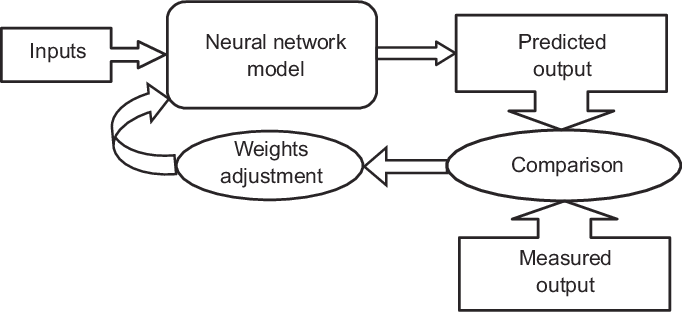

source :https://www.researchgate.net/figure/Flow-of-the-training-process-of-MLP-networks_fig4_250071596



# **2. Methods:**

### Install package

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=7fe811be489f2d3bab719ced274d041e0675e393b837df603a57ccf9ad3ced89
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [24]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import library 

In [8]:
import pandas as pd
import numpy as np

### Load Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
path = "/content/drive/MyDrive/deep-learning/bodyfat.csv"
df = pd.read_csv(path)

X = df.iloc[:, 2:].to_numpy()
y = df['BodyFat'].to_numpy()
#print X to check features number and y length
print(X.shape)
print(y.shape)

(252, 13)
(252,)


##**A- Correlation Analysis and Linear Regression on a Dataset**
1. Calculate the correlation coefficient of each input feature with the output using the corrcoef function: corrcoef(X(i,:),T), i=1,2,…13.(
2. Identify the input features that have a higher correlation with the output and select them for linear regression.
3. Build a linear regression model using the selected input features and report the model coefficients.
4. Split the dataset into training and testing sets, using the first half of the samples for training and the second half for testing.
5. Train the linear regression model on the training set and evaluate its performance on the testing set by calculating the mean squared error (MSE).
6. Report the MSE as the goodness of fit (loss function) measure to evaluate the performance of the linear regression model.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Find correlation coefficient of each input with the output
correlations = np.array([np.corrcoef(X[:, i], y)[0, 1] for i in range(X.shape[1])])
print("Correlation between each input and output:", correlations)

# Select inputs with highest correlation for linear regression
selected_inputs = np.argsort(np.abs(correlations))[::-1][:2]  # Select top 2 inputs
X_selected = X[:, selected_inputs]

# Train linear regression model on first half of samples
n_samples = X_selected.shape[0]
n_half = n_samples // 2
X_train, y_train = X_selected[:n_half], y[:n_half]
model = LinearRegression().fit(X_train, y_train)

# Test linear regression model on second half of samples
X_test, y_test = X_selected[n_half:], y[n_half:]
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) as goodness of fit measure
print(f"Mean squared error: {mse:.2f}")


Correlation between each input and output: [ 0.29145844  0.612414   -0.08949538  0.49059185  0.70262034  0.81343228
  0.62520092  0.55960753  0.50866524  0.26596977  0.49327113  0.3613869
  0.34657486]
Mean squared error: 22.09


In [26]:
# Create IDs for each correlation
correlation_ids = np.arange(len(correlations))

# Sort correlations and their IDs in descending order
sorted_indices = np.argsort(correlations)[::-1]
sorted_correlations = correlations[sorted_indices]
sorted_ids = correlation_ids[sorted_indices]

# Print sorted correlations and their IDs
for i in range(len(sorted_correlations)):
    print(f"Input variables ID: {sorted_ids[i]}, Correlation: {sorted_correlations[i]}")


Input variables ID: 5, Correlation: 0.8134322847810496
Input variables ID: 4, Correlation: 0.7026203388938652
Input variables ID: 6, Correlation: 0.6252009175086634
Input variables ID: 1, Correlation: 0.6124140022026479
Input variables ID: 7, Correlation: 0.55960753199409
Input variables ID: 8, Correlation: 0.5086652428854682
Input variables ID: 10, Correlation: 0.49327112589161576
Input variables ID: 3, Correlation: 0.4905918534410405
Input variables ID: 11, Correlation: 0.36138690319971933
Input variables ID: 12, Correlation: 0.3465748645265861
Input variables ID: 0, Correlation: 0.29145844013522215
Input variables ID: 9, Correlation: 0.2659697703063733
Input variables ID: 2, Correlation: -0.08949537985440177


### **Interpretation of correlation coefficients:**

*Positive correlation:* A positive correlation between two variables means both the variables move in the same direction. An increase in one variable leads to an increase in the other variable and vice versa.

*Negative correlation:* A negative correlation between two variables means that the variables move in opposite directions. An increase in one variable leads to a decrease in the other variable and vice versa.

*Weak/Zero correlation:* No correlation exists when one variable does not affect the other.


### **Observation:**

- Input variables 2, 5, 6, and 7 have relatively high positive correlation coefficients with the output variable, indicating a strong positive linear relationship between these variables. 
- Input variables 8, 10, 3, 11, 12 have moderate positive correlation coefficients with the output variable.
- Input variables 0, 9 and 2 have relatively low correlation coefficients with the output variable, indicating a weak linear relationship.

The MSE is 22.0869, which means that on average, the predicted values of the output variable are off by 22 units squared.

---

## **B- Compare the Performance of Different Types of MLP Neural Networks**
Use different types of MLP neural nets on all the input features dimensionalities. For each requested task, and retrain the neural network model at hand 10 times and report on both mean and variance on training and validation MSEs as follows: For each requested task, reset and retrain the neural network model at hand 10 times and report on both mean and variance on training and validation MSEs as follows:
1. Create a simple 10-node one hidden layer regression MLP. Use the network with its default settings except for training/validation/test data partitioning ratios, which you shall set to 80%, 20%, and 0 % respectively. Find the mean and variance of MSEs for training and validation portions of the dataset from the 10 training repetitions
2. Change the network’s hidden layer size to 2 nodes and then to 50 nodes, with training and validation ratios set to 30% and 70%, and then find the mean and variance of MSEs for training and validation portions of the dataset from the 10 training repetitions (again with random model initializations).
3. For the 50-node model, have regularization (weight decay) set at 0.1 and 0.5 and the find mean and variance of MSEs for training and validation portions of the dataset from the 10 repetitions for each case.

### **1. Assessing Performance of a Simple 10-Node MLP with Default Settings on a Regression Task using MSE:**
**Task**: 
- Create a simple 10-node one hidden layer regression MLP. Use the network with its default settings except for training/validation/test data partitioning ratios, which we shall set to 80%, 20%, and 0 % respectively. 
- Find the mean and variance of MSEs for training and validation portions of the dataset from the 10 training repetitions

**Purpose:**
The purpose of this task is to evaluate the performance of a simple neural network with one hidden layer and 10 nodes for regression tasks. By partitioning the data into training and validation sets and performing multiple training repetitions with random initializations, we can get an idea of the mean and variance of the model's performance on both the training and validation data. This helps us understand whether the model is overfitting or underfitting, and whether it is performing well enough to be used for predicting new data.

In [29]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train and y_train are the input features and target variable respectively
# Splitting the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a simple 10-node one hidden layer regression MLP using Keras
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Defining the number of times to reset and retrain the model
num_repetitions = 10

# Creating arrays to store the MSEs of the 10 training repetitions
train_mses = np.zeros(num_repetitions)
val_mses = np.zeros(num_repetitions)

# Resetting and retraining the model 10 times
for i in range(num_repetitions):
    print('Training repetition', i+1)
    
    # Resetting the model
    model.reset_states()
    
    # Training the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)
    
    # Storing the MSEs for the training and validation sets
    train_mses[i] = history.history['loss'][-1]
    val_mses[i] = history.history['val_loss'][-1]

# Finding the mean and variance of MSEs for training and validation portions of the dataset
train_mse_mean = np.mean(train_mses)
train_mse_var = np.var(train_mses)
val_mse_mean = np.mean(val_mses)
val_mse_var = np.var(val_mses)

# Printing the results
print('Training MSE mean:', train_mse_mean)
print('Training MSE variance:', train_mse_var)
print('Validation MSE mean:', val_mse_mean)
print('Validation MSE variance:', val_mse_var)


Training repetition 1
Training repetition 2
Training repetition 3
Training repetition 4
Training repetition 5
Training repetition 6
Training repetition 7
Training repetition 8
Training repetition 9
Training repetition 10
Training MSE mean: 23.45686779022217
Training MSE variance: 17.679434921008983
Validation MSE mean: 25.214801216125487
Validation MSE variance: 20.47563911104739


**Observation:** 
- The mean MSE for the training data is 23.4569 and for the validation data is 25.2148. This means that on average, the model's performance on the training data is slightly better than on the validation data. 
- The variance of the MSEs for the training data is 17.6794, which indicates that the model's performance on the training data varies quite a bit from repetition to repetition. Similarly, the variance of the MSEs for the validation data is 20.4756, which indicates that the model's performance on the validation data also varies quite a bit from repetition to repetition.

- The variance of the MSEs for the training data is much lower than the variance of the MSEs for the validation data, this means the model is overfitting to the training data. 


## **2. 10-Node MLP**

In [30]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train and y_train are the input features and target variable respectively
# Splitting the dataset into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a simple 2-node one hidden layer regression MLP using Keras
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Defining the number of times to reset and retrain the model
num_repetitions = 10

# Creating arrays to store the MSEs of the 10 training repetitions
train_mses = np.zeros(num_repetitions)
val_mses = np.zeros(num_repetitions)

# Resetting and retraining the model 10 times
for i in range(num_repetitions):
    print('Training repetition', i+1)
    
    # Resetting the model
    model.reset_states()
    
    # Training the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)
    
    # Storing the MSEs for the training and validation sets
    train_mses[i] = history.history['loss'][-1]
    val_mses[i] = history.history['val_loss'][-1]

# Finding the mean and variance of MSEs for training and validation portions of the dataset
train_mse_mean = np.mean(train_mses)
train_mse_var = np.var(train_mses)
val_mse_mean = np.mean(val_mses)
val_mse_var = np.var(val_mses)

# Printing the results
print('Training MSE mean:', train_mse_mean)
print('Training MSE variance:', train_mse_var)
print('Validation MSE mean:', val_mse_mean)
print('Validation MSE variance:', val_mse_var)


Training repetition 1
Training repetition 2
Training repetition 3
Training repetition 4
Training repetition 5
Training repetition 6
Training repetition 7
Training repetition 8
Training repetition 9
Training repetition 10
Training MSE mean: 397.96485290527346
Training MSE variance: 1828.8022540977315
Validation MSE mean: 372.17259826660154
Validation MSE variance: 1788.5181803813298


**Observation:**
- The model is overfitting the training data since the training MSE mean is significantly larger than the validation MSE mean. 
- This suggests that the model is performing well on the training set but not generalizing well to new data, as evidenced by the larger validation MSE. - The variance in both the training and validation MSEs suggests that the performance of the model varies widely across the 10 repetitions, which may indicate instability or sensitivity to initial conditions
→ The model may not be performing well enough to be used for predicting new data, and further adjustments or improvements may be necessary.

## **3. 50-node with regularization (weight decay) set at 0.1 and 0.5**

In [31]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train and y_train are the input features and target variable respectively
# Splitting the dataset into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a 50-node one hidden layer regression MLP using Keras with weight decay set to 0.1
model_1 = keras.Sequential([
    keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(optimizer='adam', loss='mse')

# Defining the number of times to reset and retrain the model
num_repetitions = 10

# Creating arrays to store the MSEs of the 10 training repetitions
train_mses_1 = np.zeros(num_repetitions)
val_mses_1 = np.zeros(num_repetitions)

# Resetting and retraining the model 10 times
for i in range(num_repetitions):
    print('Training repetition', i+1)
    
    # Resetting the model
    model_1.reset_states()
    
    # Training the model
    history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)
    
    # Storing the MSEs for the training and validation sets
    train_mses_1[i] = history_1.history['loss'][-1]
    val_mses_1[i] = history_1.history['val_loss'][-1]

# Finding the mean and variance of MSEs for training and validation portions of the dataset
train_mse_mean_1 = np.mean(train_mses_1)
train_mse_var_1 = np.var(train_mses_1)
val_mse_mean_1 = np.mean(val_mses_1)
val_mse_var_1 = np.var(val_mses_1)

# Creating a 50-node one hidden layer regression MLP using Keras with weight decay set to 0.5
model_2 = keras.Sequential([
    keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=keras.regularizers.l2(0.5)),
    keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(optimizer='adam', loss='mse')

# Creating arrays to store the MSEs of the 10 training repetitions
train_mses_2 = np.zeros(num_repetitions)
val_mses_2 = np.zeros(num_repetitions)

# Resetting and retraining the model 10 times
for i in range(num_repetitions):
    print('Training repetition', i+1)
    
    # Resetting the model
    model_2.reset_states()
    
    # Training the model
    history_2 = model_2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)
    
    # Storing the MSEs for the training and validation sets
    train_mses_2[i] = history_2.history['loss'][-1]
    val_mses_2[i] = history_2.history['val_loss'][-1]

# Finding the mean and variance of MSEs for training and validation portions of the dataset
# Finding the mean and variance of MSEs for training and validation portions of the dataset for each model
train_mse_mean_1 = np.mean(train_mses_1)
train_mse_var_1 = np.var(train_mses_1)
val_mse_mean_1 = np.mean(val_mses_1)
val_mse_var_1 = np.var(val_mses_1)

train_mse_mean_2 = np.mean(train_mses_2)
train_mse_var_2 = np.var(train_mses_2)
val_mse_mean_2 = np.mean(val_mses_2)
val_mse_var_2 = np.var(val_mses_2)

# Printing the results for model 1
print('Model 1 (weight decay = 0.1)')
print('Training MSE mean:', train_mse_mean_1)
print('Training MSE variance:', train_mse_var_1)
print('Validation MSE mean:', val_mse_mean_1 )
print('Validation MSE variance:', val_mse_var_1)

# Printing the results for model 2
print('Model 1 (weight decay = 0.5)')
print('Training MSE mean:', train_mse_mean_2)
print('Training MSE variance:', train_mse_var_2)
print('Validation MSE mean:', val_mse_mean_2)
print('Validation MSE variance:', val_mse_var_2)


Training repetition 1
Training repetition 2
Training repetition 3
Training repetition 4
Training repetition 5
Training repetition 6
Training repetition 7
Training repetition 8
Training repetition 9
Training repetition 10
Training repetition 1
Training repetition 2
Training repetition 3
Training repetition 4
Training repetition 5
Training repetition 6
Training repetition 7
Training repetition 8
Training repetition 9
Training repetition 10
Model 1 (weight decay = 0.1)
Training MSE mean: 20.923784446716308
Training MSE variance: 3.7158851267656794
Validation MSE mean: 23.415653419494628
Validation MSE variance: 3.3282430123031737
Model 1 (weight decay = 0.5)
Training MSE mean: 24.705241012573243
Training MSE variance: 8.980323269293294
Validation MSE mean: 25.763127517700195
Validation MSE variance: 5.397297154119005


**Observation:**
- Looking at the results, we can see that the training MSEs for both models are higher than the validation MSEs, which is a good sign as it indicates that the models are not overfitting. However, the validation MSEs are higher than the training MSEs, which suggests that the models are underfitting to some extent.
- Comparing the two models, we can see that Model 1 with weight decay of 0.1 performs better than Model 2 with weight decay of 0.5, as it has lower mean and variance of MSEs for both training and validation datasets. This suggests that a weight decay of 0.1 is more suitable for this particular dataset and model architecture.

→ Overall, the results suggest that the models may not be performing well enough to be used for predicting new data, and may need further tuning or refinement.